In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [25]:
def create_array(num,df):
    array = []
    i = num
    for i in range(i,i+10):
        array.append(df['aX'].iloc[i])
    i = num
    for i in range(i,i+10):
        array.append(df['aY'].iloc[i])
    i = num
    for i in range(i,i+10):
        array.append(df['aZ'].iloc[i])
    i = num
    for i in range(i,i+10):
        array.append(df['gX'].iloc[i])
    i = num
    for i in range(i,i+10):
        array.append(df['gY'].iloc[i])
    i = num
    for i in range(i,i+10):
        array.append(df['gZ'].iloc[i])
    return array

In [26]:
def fill_data(size,df):
    df_new = pd.read_csv('datasets/1x60_d_shots/header.csv')
    i=0
    j=0
    while i <= size:
        df_new = pd.DataFrame(np.insert(df_new.values,j,values=create_array(i,df),axis=0))
        i = i + 10
        j = j+1
    return df_new

In [27]:
def record_capture(capture):
    df_test = pd.read_csv('datasets/test_shots/'+capture+'.csv',header=None)
    df_test.columns = ['aX','aY','aZ','gX','gY','gZ']
    capt = fill_data(len(df_test)-1,df_test)
    capt = np.asarray(capt).astype('float32')
    
    return capt

In [28]:
def shot_name(result):
    shots=[]
    for i in range(0,len(result)):
        if((result[i][0] == 1) & (result[i][1] == 1) & (result[i][2] == 0)):
            shots.append('forehand topspin')
        elif((result[i][0] == 0) & (result[i][1] == 1) & (result[i][2] == 0)):
             shots.append('backhand topspin')
        elif((result[i][0] == 1) & (result[i][1] == 0) & (result[i][2] == 0)):
            shots.append('forehand slice')
        elif((result[i][0] == 0) & (result[i][1] == 0) & (result[i][2] == 0)):
             shots.append('backhand slice')
        elif((result[i][2] == 1)):
            shots.append('bad form')
    return shots

In [29]:
def game_shots(result):
    list=[]
    for x in shot_name(result):
        list.append(x)
    return list

In [30]:
def game_stats(game):
    ft=fs=bt=bs=bf=0
    list=[]
    for i in range(0,len(game)):
        if(game[i] == 'forehand topspin'):
            ft = ft+1
        elif(game[i] == 'forehand slice'):
            fs = fs+1
        elif(game[i] == 'backhand topspin'):
            bt = bt+1
        elif(game[i] == 'backhand slice'):
            bs = bs+1
        elif(game[i] == 'bad form'):
            bf = bf+1
    list.append(ft)
    list.append(fs)
    list.append(bt)
    list.append(bs)
    list.append(bf)
    return list

In [31]:
def dict_game_stats(shots_list):
    list = []
    list = shots_list
    list = game_stats(list)
    data = {}
    data['forehand topspin']=list[0]
    data['forehand slice']=list[1]
    data['backhand topspin']=list[2]
    data['backhand slice']=list[3]
    data['bad form']=list[4]
    return data

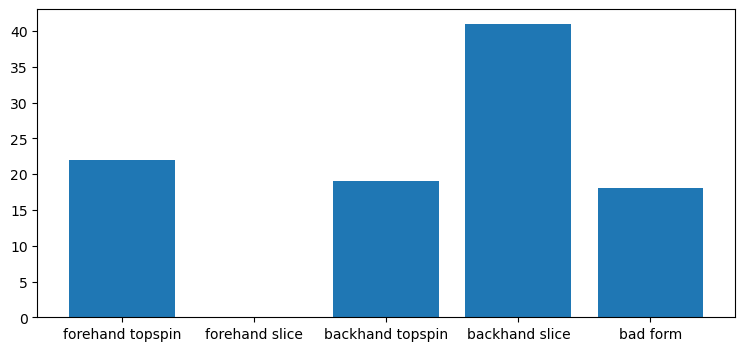

In [34]:
model = tf.keras.models.load_model('models/tt_project.h5')

In [35]:
import gradio as gr
def greet(file_name):
    
    capture = record_capture(file_name)
    result = model.predict(capture)
    result = np.rint(result)
    data = dict_game_stats(game_shots(result))
    myplot = plt.figure(figsize=(9,4))
    plt.bar(data.keys(), data.values())
    return myplot,pd.DataFrame(shot_name(result))
iface = gr.Interface(fn=greet, inputs="text", outputs=["plot","dataframe"])
iface.launch()

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


4/4 [==============================] - 0s 2ms/step


### The model misclassified 4 shots out of 100